<a href="https://colab.research.google.com/github/eduardamota/curso-eba/blob/main/desafio1_ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parte 1: Estatística Descritiva**

1.  Qual a diferença entre estatística descritiva e estatística inferencial? Forneça exemplos de aplicação para cada uma delas.
  - Falamos que a estatística descritava ela vai resumir os dados e a inferencial ela vai permear provar ou não se a nossas incertezas são ou não coerentes.

2.   Explique o conceito de média, mediana e moda. Quando você usaria cada uma dessas medidas de tendência central?
  - A média vai resumir de forma geral todos os valores da minha amostra, podendo ser influencida por valor atipicos que possam ocorrer. A mediana é o valor central da minha distribuição e a moda é o valor que mais se repete. Geralmente quando temos valores atipicos na minha amostra, vou utilizar a mediana, visto que ela não é afetada por valores extremos.
3. Quais são as principais medidas usadas para descrever a variabilidade dos dados?
  - Temos a amplitude que vai medir a variação do valor máximo e minimo dos meus dados
  - Variância: Vai nos retornar quão distantes os valores estão da média. Quando os valores estão mais dispersos, nossa variância vai ser maior
  - Desvio Padrão: Vai no falar quão distante estão nossos valores da média. A medida que o desvio cresce, maior é a dispersão
  - IQR: É a diferença entre o terceiro quartil e o primero quartiL (Q3 - Q1), ele vai mostrar a dispersão dos valores que não são afetados por valores extremos
  - Coeficiente de Variação: É feito dividindo o desvio padrão pela média. Ele permite avaliar o quanto o desvio padrão é representativo.
6. O que são outliers? O que fazer com eles? Quais tipos de medidas eles podem afetar?
- Outliers são os valores atipicos que podem aparecer na nossa amostra, elas podem acontecer devido a falha de medição e eles podem influenciar nos valores da nossa média/desvio padrão, atrapalhando as análises realizadas.





#Nosso desafio: Desafio Ifood

### O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

- Perfis de clientes
- Preferências do produto
- Sucessos/fracassos da campanha
- Desempenho do canal

### O objetivo de hoje é fazer uma análise exploratória desses dados. Responda usando a sua ferramenta de preferência:

- Quantos dados temos? Linhas e colunas
- Quais são as colunas numéricas?
- Temos duplicados na nossa base? Se tivermos, retire-os
- Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?
- Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?

###Vamos agora entender o perfil de clientes que temos

- Qual é o maior salário encontrado na nossa base? Veja na coluna Income
- Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem? Veja na coluna Income
- Nossos clientes tem níveis de educação maiores ou menores? Veja na coluna education_level
- Quantos clientes temos em cada estado civil? Veja na coluna marital_status

###Agora vamos ver como os dados se correlacionam

- Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? Filhos está na coluna kids
- As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? Veja nas colunas expenses e kids
- Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses

***Vá além!
O que você faria com as informações que tirou das perguntas acima?
Trace um problema de negócios e faça quantas perguntas forem necessárias para respondê-la.***

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#importando a dataframe
df = pd.read_csv('mkt_data.csv')
print(f"O número do colunas é: {df.shape[0]} \nNúmero de linhas é: {df.shape[1]}")

O número do colunas é: 2205 
Número de linhas é: 44


In [7]:
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [8]:
#Analisando o tipo de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

In [9]:
#Verificando se temos valores duplicados
df.duplicated().sum()

0

In [10]:
#Verificando se temos valores nulos
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

Nós temos valores nulos nas seguintes categoria:


* marital_Divorced        
* marital_Married         
* marital_Single          
* marital_Together        
* marital_Widow           
* education_2n Cycle      
* education_Basic         
* education_Graduation    
* education_Master        
* education_PhD           

Conseguimos notar que os valores são nulos apenas em dados que representam alguma característica da pessoa.

In [11]:
#Analisando isoladamente a coluna education_Graduation
df.education_Graduation.value_counts()

3.0    1113
Name: education_Graduation, dtype: int64

Vemos aqui que o único número que se repete é o 3, se repetindo 1113. Levando em consideração que nosso dataset de 2205 linhas, temos um total de 1092 dados nulos.

In [12]:
colunas_nulas = [
'marital_Divorced',
'marital_Married',
'marital_Single',
'marital_Together',
'marital_Widow',
'education_2n Cycle',
'education_Basic',
'education_Graduation',
'education_Master',
'education_PhD']

In [13]:
#Vou substituir os valores por valores boleanos
for item in colunas_nulas:
  df["booleano"+str(item)] = np.where(df[item].isnull(),0,1)

df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,booleanomarital_Divorced,booleanomarital_Married,booleanomarital_Single,booleanomarital_Together,booleanomarital_Widow,booleanoeducation_2n Cycle,booleanoeducation_Basic,booleanoeducation_Graduation,booleanoeducation_Master,booleanoeducation_PhD
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,1,0,0,0,1,0,0
3,3,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,1,0,0,0,1,0,0
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,0,0,0,0,1


In [14]:
#Avaliando os dados das nossas colunas númericas
df.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,booleanomarital_Divorced,booleanomarital_Married,booleanomarital_Single,booleanomarital_Together,booleanomarital_Widow,booleanoeducation_2n Cycle,booleanoeducation_Basic,booleanoeducation_Graduation,booleanoeducation_Master,booleanoeducation_PhD
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,1102.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,551.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1102.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1653.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2204.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Qual é o maior salário encontrado na nossa base?


In [15]:
#Vamos usar a tabela income
print(f"O maior salário da base é: {df.Income.max()}")

O maior salário da base é: 113734.0


(array([ 3.,  5., 16.,  7.,  6., 19., 30., 36., 34., 66., 53., 66., 67.,
        61., 86., 86., 83., 74., 74., 81., 63., 76., 67., 75., 70., 68.,
        71., 77., 85., 65., 82., 68., 58., 63., 60., 64., 44., 28., 17.,
        20., 13.,  8.,  3.,  2.,  2.,  1.,  1.,  0.,  0.,  1.]),
 array([  1730.  ,   3970.08,   6210.16,   8450.24,  10690.32,  12930.4 ,
         15170.48,  17410.56,  19650.64,  21890.72,  24130.8 ,  26370.88,
         28610.96,  30851.04,  33091.12,  35331.2 ,  37571.28,  39811.36,
         42051.44,  44291.52,  46531.6 ,  48771.68,  51011.76,  53251.84,
         55491.92,  57732.  ,  59972.08,  62212.16,  64452.24,  66692.32,
         68932.4 ,  71172.48,  73412.56,  75652.64,  77892.72,  80132.8 ,
         82372.88,  84612.96,  86853.04,  89093.12,  91333.2 ,  93573.28,
         95813.36,  98053.44, 100293.52, 102533.6 , 104773.68, 107013.76,
        109253.84, 111493.92, 113734.  ]),
 <BarContainer object of 50 artists>)

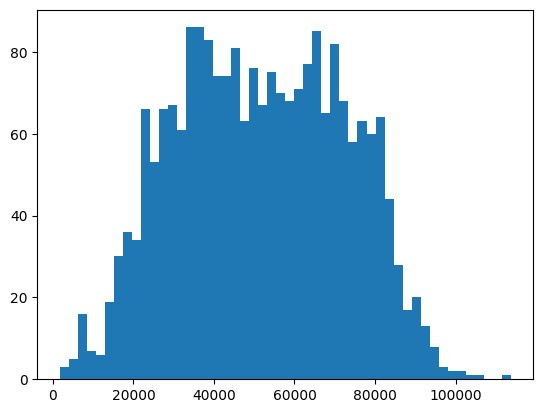

In [16]:
plt.hist(df.Income, bins=50)

In [17]:
from scipy.stats import skew
skew(df.Income)

0.013155306440415357

Vemos pela skew e pelo desenho do histograma que os dados de salário seguem uma distribuição normal.

In [18]:
df.Income.describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

<Axes: >

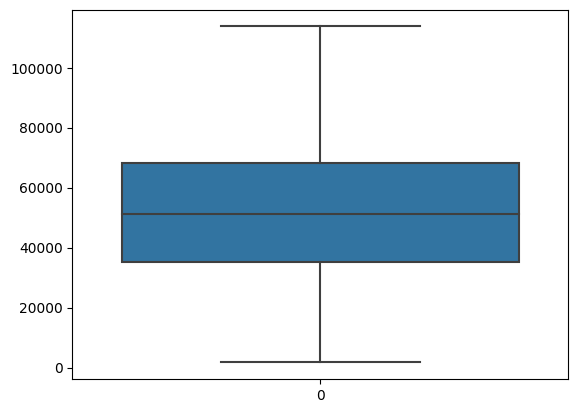

In [19]:
sns.boxplot(df.Income)

Analisando isoladamente a coluna Income, percebemos que 75% das pessoas da base ganham até 68.281, sendo uma diferença de 33k dos 25% menores. Pelo boxplot conseguimos perceber também a boa distribuição desses valores, vemos que poucas pessoas ganham menos e poucas pessoas ganham muito.

### **Nossos clientes tem níveis de educação maiores ou menores? (education_level)**

In [20]:
df.education_level.describe()

count           2205
unique             5
top       Graduation
freq            1113
Name: education_level, dtype: object

<Axes: xlabel='education_level', ylabel='count'>

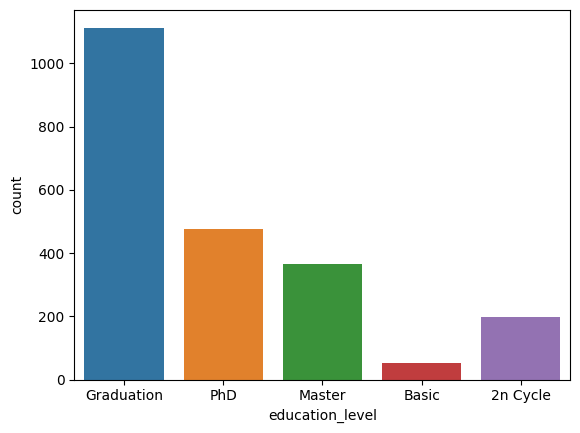

In [21]:
# Como se trata de uma variável categórica, vamos utilizar um gráfico de barras para analisar
sns.countplot(x=df.education_level)

In [22]:
tabela_frequencia = df['education_level'].value_counts()
tabela_frequencia

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: education_level, dtype: int64

Percebemos que a maior parte das pessoas tem graduação completa. Poucas pessoas não concluiram o ensino básico.

<Axes: xlabel='marital_status', ylabel='count'>

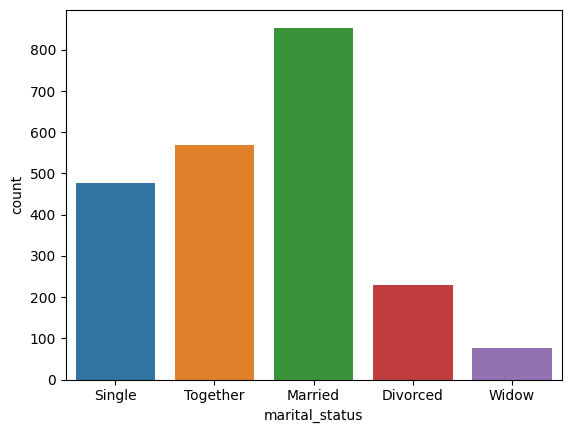

In [23]:
#Criando gráfico de barras para analisar marital_status
sns.countplot(x=df.marital_status)

Vemos aqui que a maioria das pessoas são casadas ou estão juntos. Poucas são viúvas.

### Qual é a relação de estado civil com número de filhos (kids)? Será que as pessoas casadas têm um maior número de filhos?

<Axes: xlabel='marital_status', ylabel='kids'>

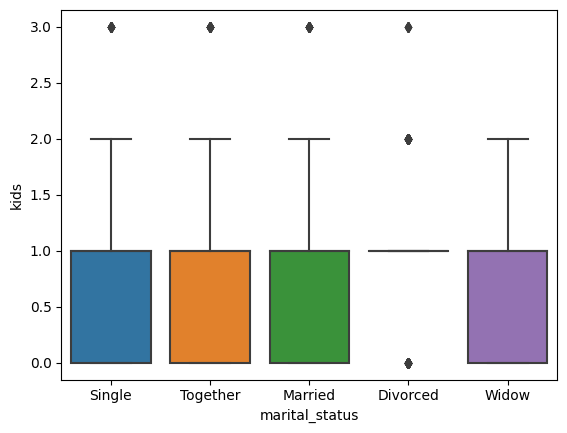

In [24]:
#Podemos avaliar essa relação com box plot
sns.boxplot(x=df.marital_status, y=df.kids)

Vemos aqui um overlap das informações pelo estado civil. Vou fazer um deepdive para conseguir analisar melhor.

In [25]:
df.groupby("marital_status")["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


Vemos aqui que os valores não variam muito de acordo com o estado civil, apesar da média dos solteiros ser um pouco menor. Ainda não há uma diferença muito grande, como vimos no box plot. Para afirmar se a diferença é significativa ou não precisaríamos de um teste de hipótese.

### As pessoas gastam mais ou menos em nossa plataforma quando têm filhos? (expenses e kids)

<Axes: xlabel='kids', ylabel='expenses'>

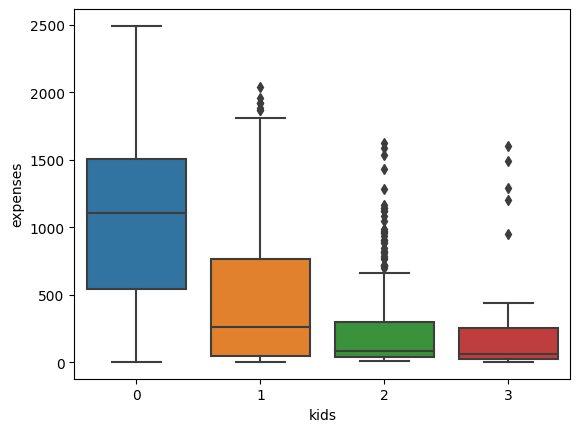

In [26]:
# Como número de filhos é númerico do tipo discreto, podemos usar um boxplot para analisar
sns.boxplot(x=df.kids,y=df.expenses)

In [27]:
df.groupby("kids")["expenses"].describe()

,count,mean,std,min,25%,50%,75%,max
kids,,,,,,,,
0,628.0,1041.207006,625.734894,5.0,546.00,1106.5,1505.50,2491.0
1,1112.0,434.530576,452.606603,4.0,50.00,264.0,762.25,2036.0
2,415.0,221.568675,290.259678,8.0,39.00,84.0,296.50,1627.0
3,50.0,237.380000,390.174157,6.0,28.25,62.0,254.00,1601.0


Pelo boxplot e pela tabela de resumo, vemos bem que o gasto de pessoas com 0 filhos é maior do que as pessoas que tem 1 filho, tanto analisando os valores de mediana quanto os de média. Quando comparamos também entre 1 e 2 filhos vemos que também temos uma diferença tanto em termos de mediana quanto de média. Já quando olhamos entre 2 e 3 analisando a média vemos que pessoas com 2 filhos gastam menos que as de 3, porém quando analisada a mediana o valor das pessoas com 2 é maior, esse valor pode ser explicado pelo volume de outliers que podemos observar entre as pessoas de 2 filhos, o que pode acabar poluindo os nossos valores.

### Pessoas que têm um maior salário gastam mais?

<Axes: xlabel='Income', ylabel='expenses'>

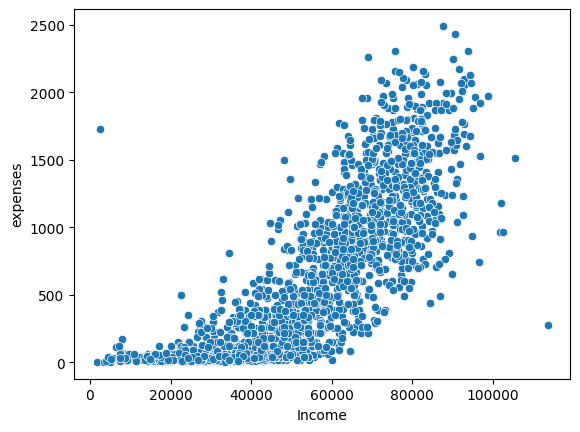

In [28]:
sns.scatterplot(x="Income",y="expenses", data=df)

Aparentemente parece ter uma correlação proporcional positiva, ou seja, a medida que o salário aumenta o valor de gastos também aumenta.

# Hipóteses

- Pessoas mais velhas recebem mais que pessoas mais novas?
- Pessoas mais velhas gastam mais que as mais novas?
- Grau de escolaridade influencia no salário?
- Grau de escolaridade influencia no número de filhos?

<Axes: xlabel='Income', ylabel='Age'>

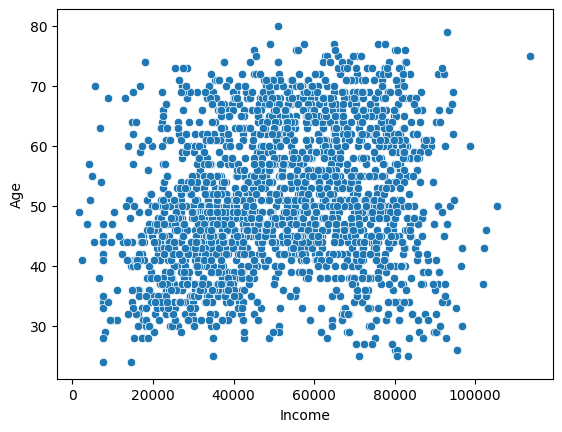

In [29]:
#Vamos fazer um scatter plot para identificar se existe uma relação entre salário e idade
sns.scatterplot(x="Income",y="Age", data=df)

Olhando o gráfico de dispersão não enxegarmos uma relação direta entre idade e salário.

In [33]:
df.groupby("Age")["expenses"].sum()

Age
24       80
25     3655
26     4268
27     5227
28     8307
29    15459
30     8841
31    11348
32    19576
33    15573
34    20005
35    10764
36    12850
37    19622
38    30245
39    16617
40    18576
41    24104
42    29488
43    23350
44    41720
45    44613
46    29641
47    26308
48    41812
49    41217
50    48337
51    41971
52    21507
53    24850
54    25830
55    41371
56    27425
57    22404
58    31441
59    25834
60    27887
61    32824
62    35581
63    24891
64    35410
65    31408
66    34994
67    23748
68    29926
69    25412
70    11095
71    24659
72    16971
73    16379
74    12079
75     7526
76     7047
77     6574
79     2098
80      151
Name: expenses, dtype: int64

<Axes: xlabel='education_level', ylabel='Income'>

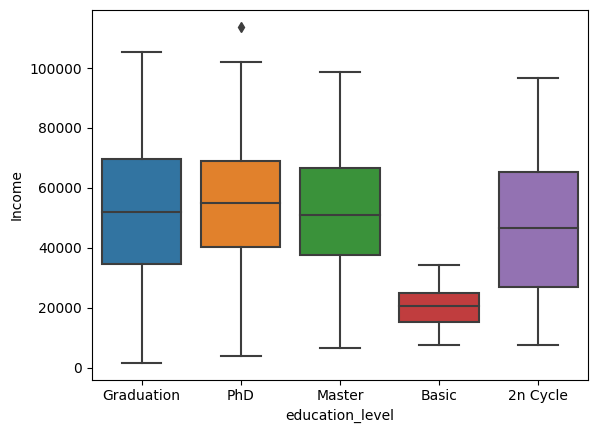

In [34]:
#Grau de escolaridade influencia no salário?
sns.boxplot(x=df.education_level,y=df.Income)

Temos um overlap entre graduação, phd, master e 2n Cycle. Porém, vemos que pessoas com nível básico realmente ganham menos.

<Axes: xlabel='education_level', ylabel='kids'>

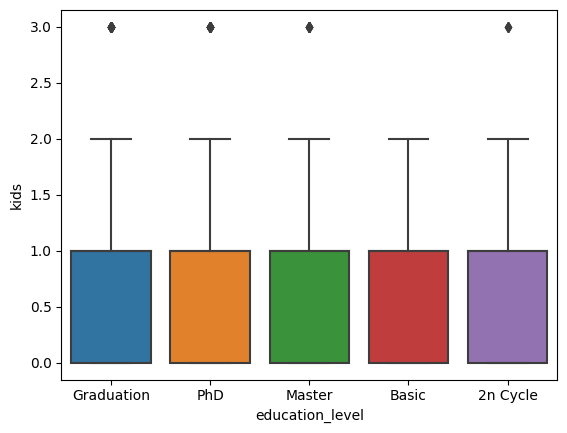

In [36]:
#Grau de escolaridade influencia no salário?
sns.boxplot(x=df.education_level,y=df.kids)

Vemos que o grau de escolaridade não influencia no número de filhos